# Exploratory Data Analysis (EDA) for Credit Risk Probability Model

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Plotting Style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

pd.set_option('display.max_columns', None)

## 2. Overview of the Dataset

In [3]:
# Load the dataset
# Note: Reading from local data folder. Adjust path if necessary.
try:
    df = pd.read_csv('../data/data.csv')
    print("Data loaded successfully from ../data/data.csv")
except FileNotFoundError:
    print("Error: File not found. Please check the data path.")

# Shape and Info
print(f"\nDataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("\n--- Data Types & Missing Values ---")
df.info()

Data loaded successfully from ../data/data.csv

Dataset Shape: 95662 rows, 16 columns

--- Data Types & Missing Values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13

In [4]:
# First 5 rows
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
# Missing Values Summary
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
if not missing_values.empty:
    print("Missing Values per Column:")
    print(missing_values)
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


## 3. Summary Statistics

In [6]:
# Numerical Statistics
desc_stats = df.describe()
display(desc_stats)

# Skewness Check
print("\nSkewness of Numerical Features:")
print(df.select_dtypes(include=[np.number]).skew())

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000



Skewness of Numerical Features:
CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64


### Observation on Skewness
High skewness in columns like `Amount` or `Value` indicates the presence of significant outliers or a heavy-tailed distribution, which is common in financial transaction data.

## 4. Visualizations

### 4.1 Numerical Distributions

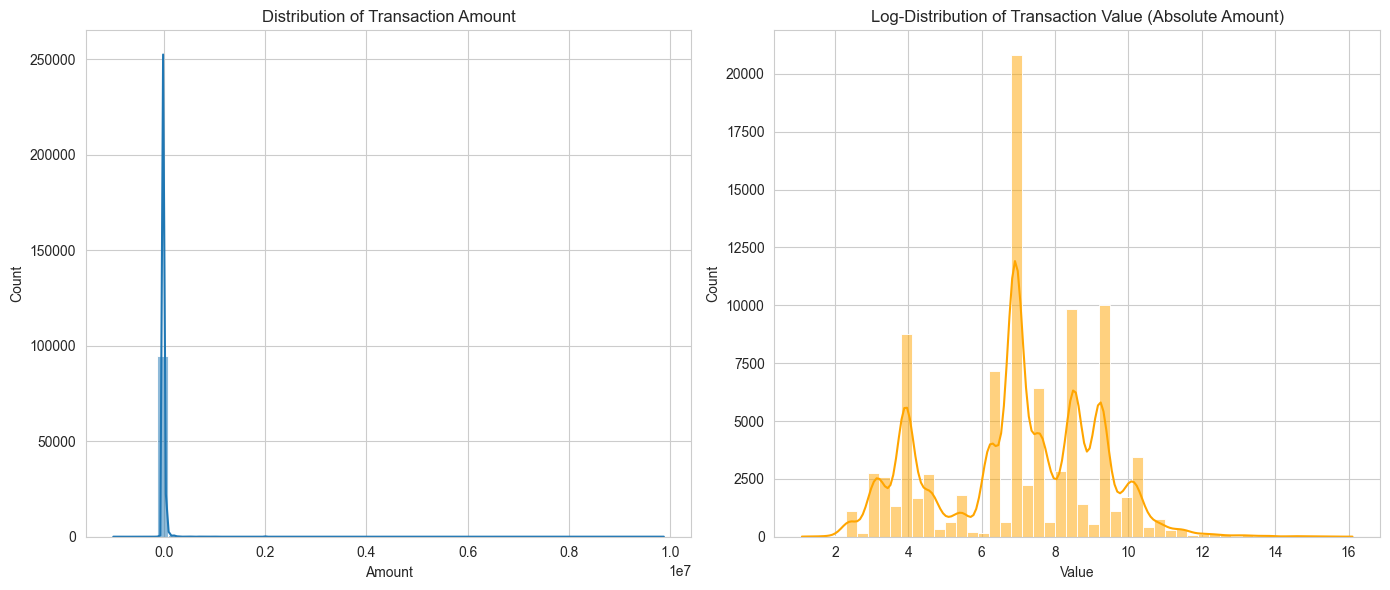

In [7]:
# Distribution of Transaction Amounts
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')

# Log Transformation for better visualization
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['Value']), bins=50, kde=True, color='orange')
plt.title('Log-Distribution of Transaction Value (Absolute Amount)')
plt.tight_layout()
plt.show()

### 4.2 Outlier Detection (Boxplots)

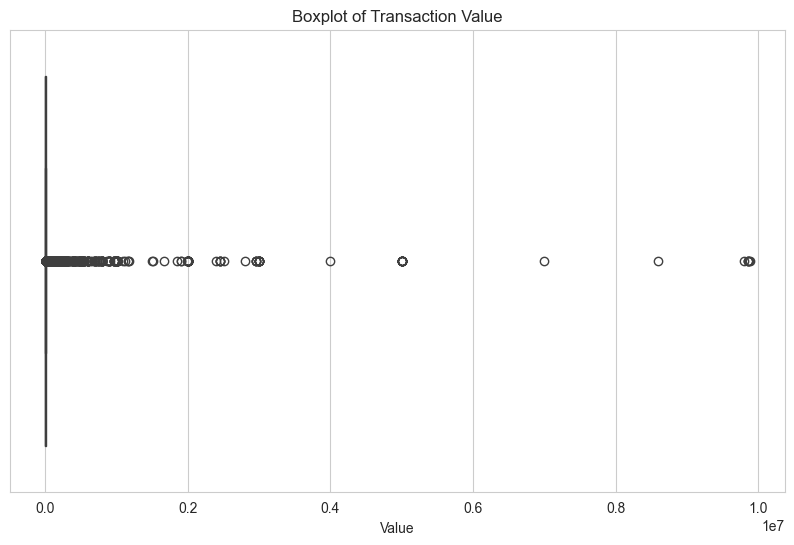

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Value'])
plt.title('Boxplot of Transaction Value')
plt.show()

### 4.3 Categorical Features

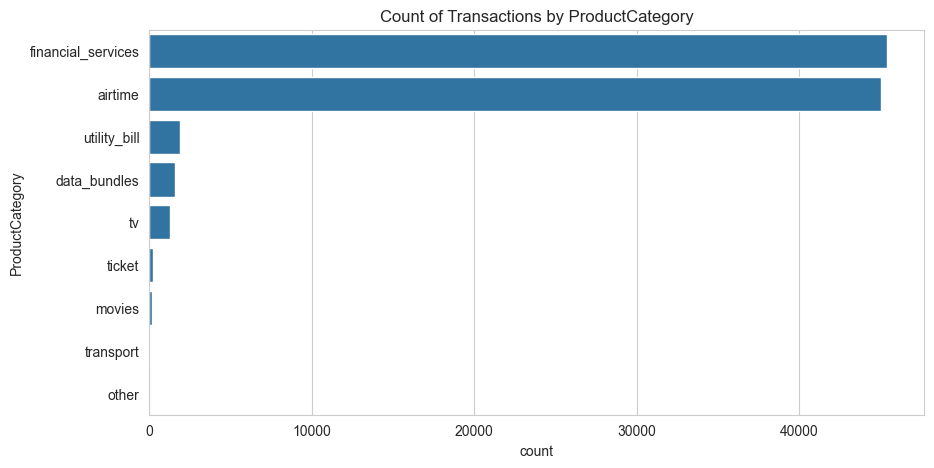

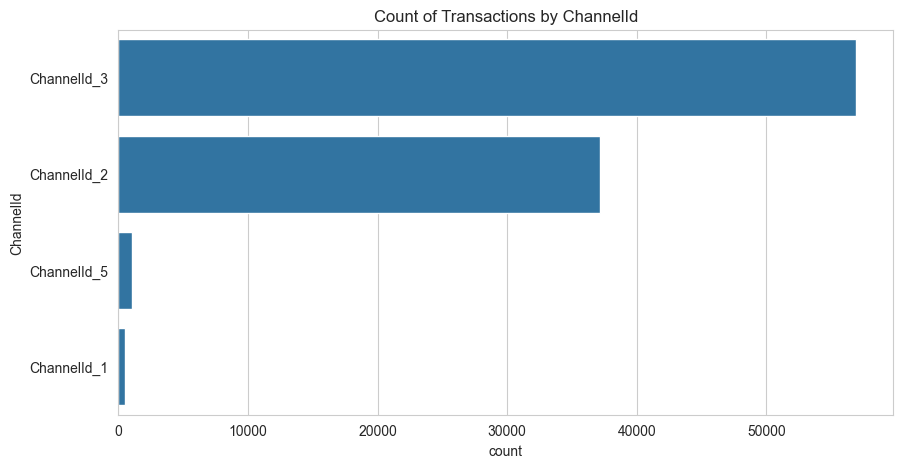

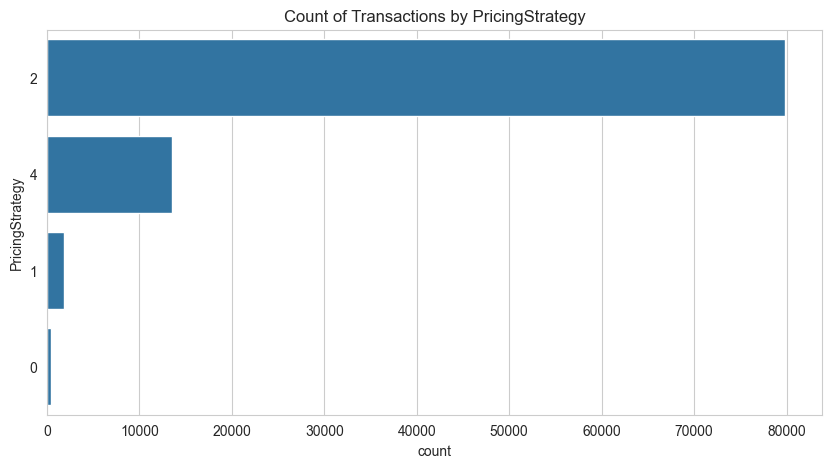

In [9]:
categorical_cols = ['ProductCategory', 'ChannelId', 'PricingStrategy'] # Adjust based on actual columns available

for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Count of Transactions by {col}')
        plt.show()

### 4.4 Correlation Heatmap

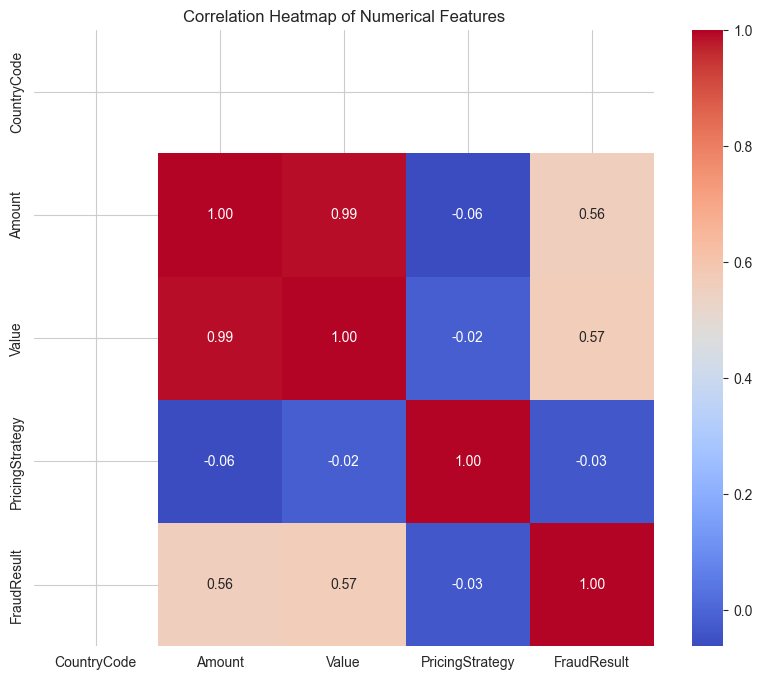

In [10]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## 5. Data Quality Checks

In [11]:
# Check for Duplicates
duplicates = df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")

if duplicates > 0:
    print("Recommendation: Remove duplicates before modeling.")
else:
    print("Data is free of exact duplicates.")

# Check for Negative Values in 'Value' column (if it represents absolute amount)
if (df['Value'] < 0).any():
    print(f"WARNING: Found {(df['Value'] < 0).sum()} negative records in 'Value' column.")


Number of Duplicate Rows: 0
Data is free of exact duplicates.


## 6. Feature Insights & Observations

Based on the initial analysis, here are key observations regarding the dataset's structure and potential risk indicators:

1.  **Transaction Skewness**: The transaction `Amount` and `Value` are highly right-skewed. Most transactions are small, with a few very large outliers. These massive outliers might represent fraud or specific high-value customer segments (Whales).
2.  **Product Categories**: Certain product categories might dominate the transaction volume. If specific categories (e.g., 'financial_services') are associated with higher `FraudResult`, they become critical features.
3.  **Fraud Imbalance**: As typical in credit risk, the `FraudResult` is likely highly imbalanced (very few fraud cases vs. legitimate ones). This necessitates the use of techniques like SMOTE or weighting during model training, or relying heavily on the RFM proxy.
4.  **Channel Behavior**: Different channels (Web vs. App) may show distinct risk profiles. If 'pay later' or similar channels exist, they are directly relevant to credit scoring.
5.  **Time Series Nature**: The existence of `TransactionStartTime` implies we can map user behavior over time. Customers with declining frequency or gaps in activity (recency) might be showing signs of financial distress.